In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df_GitHub_Metric = pd.read_csv("GitHub_Metric.csv")

In [66]:
df_GitHub_Metric = df_GitHub_Metric[['FILE_ID', 'is_Lib', 'SCHK_Block_count', 'Agg_SubSystem_count', 'Hierarchy_depth', 'LibraryLinked_Count', 'CComplexity', 'total_ConnH_cnt']]
#all values are -1 when is_lib=1, so select only is_lib==0
df_GitHub_Metric = df_GitHub_Metric[df_GitHub_Metric.is_Lib == 0]
df_GitHub_Metric1 = df_GitHub_Metric.groupby('FILE_ID').agg({'SCHK_Block_count':'sum', 
                                                            'Agg_SubSystem_count':'sum', 
                                                            'Hierarchy_depth':'max', 
                                                            'LibraryLinked_Count': 'sum',
                                                            'CComplexity' :'sum',
                                                            'total_ConnH_cnt': 'sum'
                                                           }).reset_index()

# #48991644 this has high block count value so replacing its values with means of each column the whole row
df_GitHub_Metric1= df_GitHub_Metric1.drop(df_GitHub_Metric1[df_GitHub_Metric1.SCHK_Block_count > 20000].index)
df_GitHub_Metric1.describe()
# # df_GitHub_Metric1.to_csv('df_GitHub_Metric_kmeans_cols.csv')

,FILE_ID,SCHK_Block_count,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,CComplexity,total_ConnH_cnt
count,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,1.087170e+08,636.283721,49.404651,2.641860,14.316279,42.204651,616.767442
std,6.220192e+07,1898.284272,163.893398,1.836066,90.745472,224.709355,1786.957899
min,7.896830e+05,0.000000,0.000000,1.000000,0.000000,-85.000000,0.000000
25%,5.421030e+07,32.500000,0.000000,1.000000,0.000000,-2.000000,30.500000
50%,1.031503e+08,102.000000,5.000000,2.000000,0.000000,-1.000000,109.000000
75%,1.572655e+08,320.500000,24.000000,3.000000,2.000000,4.500000,368.500000
max,2.284319e+08,15418.000000,1920.000000,11.000000,1257.000000,2184.000000,14403.000000


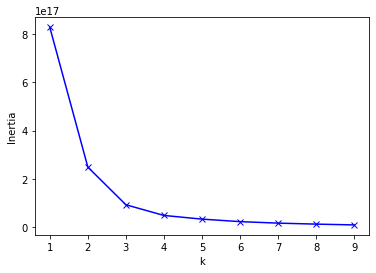

In [67]:
from sklearn.cluster import KMeans
import numpy as np
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=200, algorithm='full')
    kmeanModel.fit(df_GitHub_Metric1)
    inertia.append(kmeanModel.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [71]:
k=8
model = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=200, algorithm='full')
model.fit(df_GitHub_Metric1)
df_GitHub_Metric1['labels'] = model.labels_
df_GitHub_Metric1.to_csv('df_GitHub_Metric_kmeans_cols.csv')
model.labels_

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

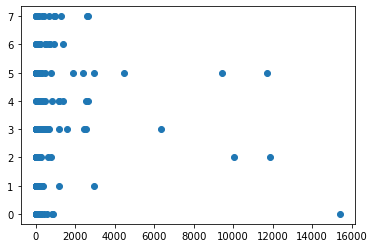

In [72]:
plt.scatter(df_GitHub_Metric1['SCHK_Block_count'] , df_GitHub_Metric1['labels'])
# 'SCHK_Block_count', 'Agg_SubSystem_count', 'Hierarchy_depth', 'LibraryLinked_Count', 'CComplexity', 'total_ConnH_cnt'
plt.show()
plt.xlabel("SCHK_Block_count")
plt.ylabel("labels")

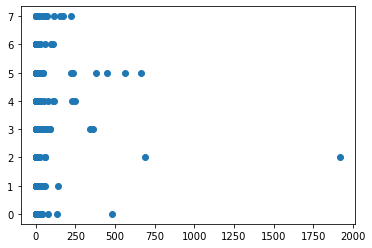

In [73]:
plt.scatter(df_GitHub_Metric1['Agg_SubSystem_count'] , df_GitHub_Metric1['labels'])
# 'SCHK_Block_count', 'Agg_SubSystem_count', 'Hierarchy_depth', 'LibraryLinked_Count', 'CComplexity', 'total_ConnH_cnt'

plt.xlabel("Agg_SubSystem_count")
plt.ylabel("labels")
plt.show()

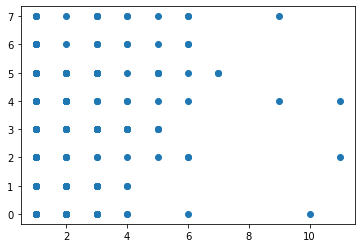

In [74]:
plt.scatter(df_GitHub_Metric1['Hierarchy_depth'] , df_GitHub_Metric1['labels'])
Agg_SubSystem_count
plt.show()

In [ ]:
plt.scatter(df_GitHub_Metric1['LibraryLinked_Count'] , df_GitHub_Metric1['labels'])
# 'SCHK_Block_count', 'Agg_SubSystem_count', 'Hierarchy_depth', 'LibraryLinked_Count', 'CComplexity', 'total_ConnH_cnt'
plt.show()

In [ ]:
plt.scatter(df_GitHub_Metric1['CComplexity'] , df_GitHub_Metric1['labels'])
# 'SCHK_Block_count', 'Agg_SubSystem_count', 'Hierarchy_depth', 'LibraryLinked_Count', 'CComplexity', 'total_ConnH_cnt'
plt.show()

In [ ]:
plt.scatter(df_GitHub_Metric1['total_ConnH_cnt'] , df_GitHub_Metric1['labels'])
# 'SCHK_Block_count', 'Agg_SubSystem_count', 'Hierarchy_depth', 'LibraryLinked_Count', 'CComplexity', 'total_ConnH_cnt'
plt.show()